In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
sns.set_style("whitegrid")

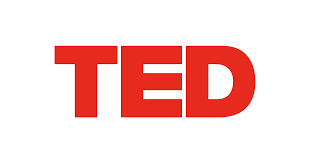

# Agenda:
### 1- import data and show info
### 2- show number of tedtalks through years
### 3- what is the best in TED history to attend?
### 4- the occupations that dominate TedTalks
### 5- figure out the TEDTalks that has highest ratio of comments per views [ interaction ]
### 6- Unpack the Ratings columns to get informations
### 7- try to figure out the funniest TedTalks.
### 8- try to figure out the most Confusing TedTalks.
### 9- Avegare Funny_ratio of ratings for occupations

# 1- import data and show info

In [2]:
df=pd.read_csv("../input/ted-talks/ted_main.csv")

In [3]:
df.head() 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
df.describe() 

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [6]:
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2- show number of TedTaks through years

In [7]:
df["film_date"]=pd.to_datetime(df["film_date"],unit="s")
df["published_date"]=pd.to_datetime(df["published_date"],unit="s")
years=df["film_date"].dt.year.value_counts().sort_index(ascending=True)

In [8]:
fig=px.line(x=years.index,y=years.values,
           labels={"y":"Number of events","x":"Year"},
      title="Number of events through years",
       color_discrete_sequence=["#31bf9b"],
       range_x=[1990,2017],
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
for i,value in enumerate(years[years==years.max()].index):
    fig.add_vline(x=value) 
fig.show() 

# 3- what is the best in TED history to attend?
- the answer depends on the definition of the best
- i will define the best event according to the total number of views on the talks

In [9]:
# group the data by the event and calculate the sum
sums=df.groupby("event")["views"].agg(["sum","mean","count"]).sort_values("sum",ascending=False) .nlargest(10,"sum")

In [10]:
text=(sums["mean"]/1000000).round(2).astype(str)+" M"
fig=px.bar(sums,x=sums.index,y="mean",
           labels={"y":"Sum & mean & number of talks","x":"event"},
      title="Average number of views for event",
       color_discrete_sequence=["#154360"],
           text=text 
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9,color="#fff")
fig.show()

In [11]:
text=(sums["sum"]/1000000).round(1).astype(str)+" M"
fig=px.bar(sums,x=sums.index,y="sum",
           labels={"y":"Sum & mean & number of talks","x":"event"},
      title="Total number of views for event",
       color_discrete_sequence=["#154360"],
           text=text 
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9,color="#fff")
fig.show()

# 4- The occupations that dominate TedTalks
- occupation and it's number of talks

In [12]:
# get the value counts of each occupation
s=df["speaker_occupation"].value_counts().sort_values(ascending=False).nlargest(10)
s

Writer          45
Designer        34
Artist          34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

In [13]:
fig=px.pie(names=s.index,values=s.values,labels={
    "names":"The occupation ",
    "values":"Number of talks "
},
title="The highest 10 occupation with the number of talks",
color_discrete_sequence=px.colors.sequential.Bluyl
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Occupation")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

# 5- TedTalks that highest percent of comments per views

In [14]:
# make the new column that define the interaction
df["interaction"]=round((df["comments"]/df["views"])*100,2)

In [15]:
interaction=df.sort_values("interaction",ascending=False)[["name","interaction","main_speaker","views"]]\
[df.views> df.views.mean()].nlargest(10,"interaction").sort_values("interaction",ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [16]:
fig=px.bar(interaction,x="main_speaker",y="interaction",
       title="Percent of Comments for highest 10 talks",
      color_discrete_sequence=["#154360"],
      hover_data={"name":True,"main_speaker":False},
           text="interaction",
           
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#fff",
    plot_bgcolor="#D0D3D4")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textposition="inside",textfont_color="#fff",textfont_size=13)
fig.show()

# 6- Unpack Ratings Column
- get the information from the rating columns

In [17]:
df["ratings"].dtype

dtype('O')

In [18]:
import ast
# get the list inside the string dtype as a list
df["ratings"]=df["ratings"].apply(lambda x:ast.literal_eval(x))


In [19]:
df.ratings[0]


[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

- it is alist of dictionaries

In [20]:
# function to get the total number of rating for each talk
def get_total(x):
    count=0
    for i in x:
        # note:  i here represents the dic
        count+=i["count"]
    return count
        

In [21]:
df["total_num_rating"]=df["ratings"].apply(lambda x: get_total(x))

In [22]:
df["total_num_rating"].head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: total_num_rating, dtype: int64

# 7- try to figure out the funniest TedTalks.
- get the ratio of funny ratings to the total rating
- make a function to get the funny ratings

In [23]:
def get_funny_ratings(x):
    for i in x:
        if i["name"]=="Funny":
            return i["count"]
        

In [24]:
df["funny_ratings"]=df["ratings"].apply(lambda x: get_funny_ratings(x))

In [25]:
df["funny_ratio"]=round((df["funny_ratings"]/df["total_num_rating"])*100,2)

In [26]:
df.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,interaction,total_num_rating,funny_ratings,funny_ratio
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.01,93850,19645,20.93
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.01,2936,544,18.53


- i want only the talks that have ratings above the average


In [27]:
funny=df[(df.total_num_rating>df.total_num_rating.mean())]\
.nlargest(10,"funny_ratio").sort_values("funny_ratio",ascending=True)


In [28]:
fig=px.bar(funny,x="main_speaker",y="funny_ratio",color="speaker_occupation",
          title="highest 10 tedtakls with Funny_ratings Ratio and thier occupation".title(),
           color_discrete_sequence=px.colors.sequential.Bluyl ,
           hover_data={"name":True},
           labels={"name":"Talk_name "},
           text="funny_ratio" 
          )

fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4 ",legend_title_font_size=17,legend_title_font_color="#fff")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

# 8- Try to figure out the most confusing TedTalks.
- according to the audience opinion
- the same way we deal with the funny ratio, above avererage

In [29]:
def confuse(x):
    for i in x:
        if i["name"]=="Confusing":
            return i["count"]

In [30]:
# make a column with the ratio of confusing rating to the total ratings number
df["confuse_ratio"]=round((df["ratings"].apply(lambda x: confuse(x))/ df["total_num_rating"])*100,2)

In [31]:
confuse_ratio=df[(df.total_num_rating>df.total_num_rating.mean())]\
.nlargest(10,"confuse_ratio").sort_values("confuse_ratio",ascending=True)

In [32]:
fig=px.bar(confuse_ratio,x="main_speaker",y="confuse_ratio",color="speaker_occupation",
          title="highest 10 tedtakls with confuse_ratio ratings  and thier occupation",
          labels={"name":"tedtalk name"},
          text="confuse_ratio",
           color_discrete_sequence=px.colors.sequential.Bluyl 
          )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Occupation")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

# 9- what is highest 10 occupation with the average fuuny ratings ratio 

In [33]:
funny_average=df.groupby("speaker_occupation")["funny_ratio"].mean().sort_values(ascending=False).nlargest(10)
funny_average.shape

(10,)

In [34]:
fig=px.pie(names=funny_average.index,values=funny_average.values,labels={
    "names":"the occupation ",
    "values":"AVG. funny_ratio ",
   
},
title="The highest 10 occupation in the AVG. funny_ratio ratings",
color_discrete_sequence=px.colors.sequential.Bluyl
          )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Occupation")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

# 10- Adding tha other Ratings

In [35]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'interaction', 'total_num_rating', 'funny_ratings',
       'funny_ratio', 'confuse_ratio'],
      dtype='object')

In [36]:
def get_column(column_name):
    def name(x):
        for i in x:
            if i["name"]==column_name:
                return i["count"]
    df[column_name+"_ratio"]=round((df["ratings"].apply(lambda x: name(x))/ df["total_num_rating"])*100,2)

In [37]:
rest=["Beautiful","Ingenious","Courageous","Longwinded","Longwinded","Confusing","Informative","Fascinating"
,"Unconvincing","Persuasive","Jaw-dropping","Obnoxious","Inspiring"
]

In [38]:
for column_name in rest:
    get_column(column_name)

In [39]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'interaction', 'total_num_rating', 'funny_ratings',
       'funny_ratio', 'confuse_ratio', 'Beautiful_ratio', 'Ingenious_ratio',
       'Courageous_ratio', 'Longwinded_ratio', 'Confusing_ratio',
       'Informative_ratio', 'Fascinating_ratio', 'Unconvincing_ratio',
       'Persuasive_ratio', 'Jaw-dropping_ratio', 'Obnoxious_ratio',
       'Inspiring_ratio'],
      dtype='object')

## we can do the same operation towards any other kind of ratings

## if you liked it, an upvote will make me happy 
- thanks